# Predict pizza price

## Preparation 

In [9]:
# Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading data
df = pd.read_csv('Pizza-Price.csv')

## EDA

In [5]:
df

,Restaurant,Extra Cheeze,Extra Mushroom,Size by Inch,Extra Spicy,Price
0,A,yes,yes,12,no,650
1,B,no,yes,15,yes,800
2,C,no,no,9,no,500
3,D,yes,no,12,yes,700
4,E,yes,no,12,yes,750
5,F,no,yes,15,yes,900
6,G,yes,no,9,no,600
7,H,yes,no,9,yes,700
8,I,no,yes,15,no,750
9,J,no,yes,15,no,700


In [25]:
# Renaming ' Size by Inch'
df.rename(columns={' Size by Inch': 'Size by Inch'}, inplace=True)

In [26]:
df.describe()

,Size by Inch,Price
count,20.000000,20.000000
mean,11.600000,727.500000
std,2.500526,130.257841
min,8.000000,500.000000
25%,9.000000,650.000000
50%,12.000000,700.000000
75%,12.750000,762.500000
max,15.000000,1000.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Restaurant      20 non-null     object
 1   Extra Cheeze    20 non-null     object
 2   Extra Mushroom  20 non-null     object
 3   Size by Inch    20 non-null     int64 
 4   Extra Spicy     20 non-null     object
 5   Price           20 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 1.1+ KB


In [28]:
df.isnull().sum()

Restaurant        0
Extra Cheeze      0
Extra Mushroom    0
Size by Inch      0
Extra Spicy       0
Price             0
dtype: int64

## Visualization

<AxesSubplot:xlabel='Extra Cheeze', ylabel='Price'>

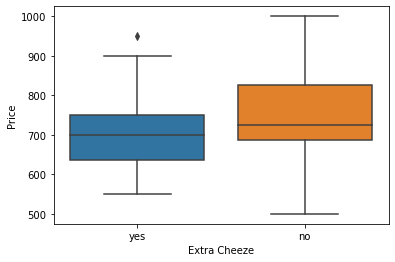

In [29]:
# Extra Cheeze
sns.boxplot(x=df['Extra Cheeze'], y=df['Price'])

<AxesSubplot:xlabel='Extra Mushroom', ylabel='Price'>

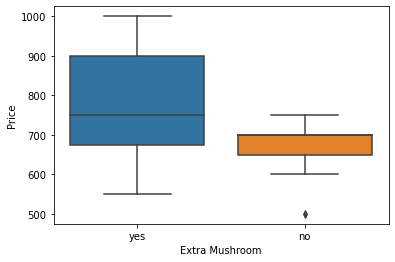

In [30]:
# Extra Mushroom
sns.boxplot(x=df['Extra Mushroom'], y=df['Price'])

<AxesSubplot:xlabel='Extra Spicy', ylabel='Price'>

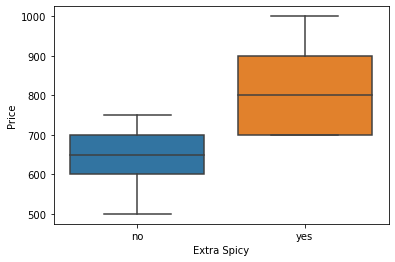

In [31]:
# Extra Spicy
sns.boxplot(x=df['Extra Spicy'], y=df['Price'])

<AxesSubplot:xlabel='Size by Inch', ylabel='Price'>

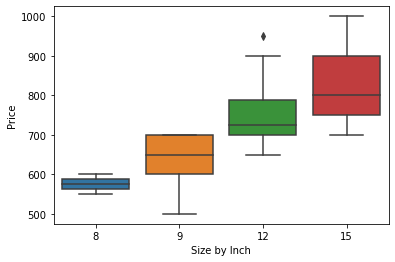

In [32]:
# Size by Inch
sns.boxplot(x=df['Size by Inch'], y=df['Price'])

<AxesSubplot:xlabel='Size by Inch', ylabel='Price'>

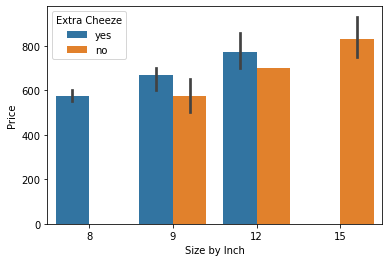

In [37]:
# Size and extra cheeze
sns.barplot(x=df['Size by Inch'], y=df['Price'], hue=df['Extra Cheeze'] )

<AxesSubplot:xlabel='Size by Inch', ylabel='Price'>

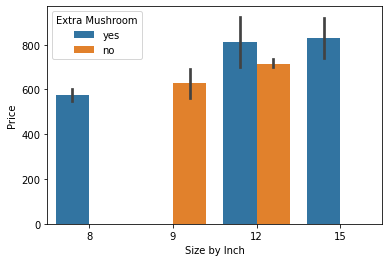

In [38]:
# Size and extra mushroom
sns.barplot(x=df['Size by Inch'], y=df['Price'], hue=df['Extra Mushroom'] )

<AxesSubplot:xlabel='Size by Inch', ylabel='Price'>

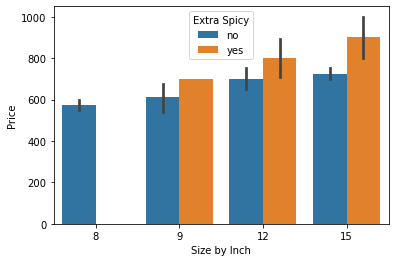

In [39]:
# Size and extra spicy
sns.barplot(x=df['Size by Inch'], y=df['Price'], hue=df['Extra Spicy'] )

## Preprocessing

In [41]:
# string(yes/no) to 1/0
df.replace('yes', 1, inplace=True)
df.replace('no', 0, inplace=True)
df

,Restaurant,Extra Cheeze,Extra Mushroom,Size by Inch,Extra Spicy,Price
0,A,1,1,12,0,650
1,B,0,1,15,1,800
2,C,0,0,9,0,500
3,D,1,0,12,1,700
4,E,1,0,12,1,750
5,F,0,1,15,1,900
6,G,1,0,9,0,600
7,H,1,0,9,1,700
8,I,0,1,15,0,750
9,J,0,1,15,0,700


In [42]:
# Making input/target data
pizza_input = df[['Extra Cheeze', 'Extra Mushroom', 'Size by Inch', 'Extra Spicy']].to_numpy()
pizza_target = df['Price'].to_numpy()

In [43]:
# Split train/test data
from sklearn.model_selection import train_test_split

In [121]:
train_input, test_input, train_target, test_target \
= train_test_split(pizza_input, pizza_target, test_size=1/4)

## Test models

### 1. KNeighborsRegressor

In [122]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

In [123]:
knr = KNeighborsRegressor()
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.7528631705846895
0.32971014492753625


### 2. DecisionTree

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
dt = DecisionTreeClassifier()
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.6666666666666666
0.2


### 3. Random Forest

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
rf = RandomForestClassifier()
rf.fit(train_input, train_target)
print(rf.score(train_input, train_target))
print(rf.score(test_input, test_target))

0.6666666666666666
0.2


### 4. KNeighborsClassifier

In [130]:
from sklearn.neighbors import KNeighborsClassifier

In [131]:
knc = KNeighborsClassifier()
knc.fit(train_input, train_target)
print(knc.score(train_input, train_target))
print(knc.score(test_input, test_target))

0.4666666666666667
0.2
